In [48]:
# Standard imports
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from time import time
import pandas as pd


from Jet_Observables import NSubJettiness, Thrust, Uniform, Disk, Ellipse, Point, NStructure
from src.Observables import CustomObservable

from src.utils.plot_utils import load_data, plot, plot_event, make_gif, timer_func
from utils import load_dataset

(25000, 200, 3)
171.30413009311044
158.9693130074576
161.6709548277763
217.78496066391168
157.1739932749623
145.224438230974
210.35511596145994
177.41657786466106
162.74283877110196
163.63866635517257
170.3576439203059
184.45016632605598
141.4605829588729
175.44704442677346
184.92676363567008
162.4442373605805
148.9623001817155
165.37205399302044
188.76134723766813
196.78699343734533
159.86244258701095
141.6034302870565
156.7598874524902
186.42487167181534
176.3970632284652
176.03360787616168
206.68555074523508
226.98550730611316
197.07720436144035
199.08915373514188
194.02682045703895
222.23402839990294
189.07924913438973
194.60076760887804
153.22383957002594
184.61172023317496
181.1678834389061
177.36232493923788
176.75793699476736
169.7813773435615
164.98595747505686
160.1663605195856
181.10157347849085
167.8657250667833
156.9408770372269
216.71362782196286
183.82859213843093
137.17973524294436
209.40836609362938
159.55058490438918
172.14346141202506
188.02718152560792
175.928192452

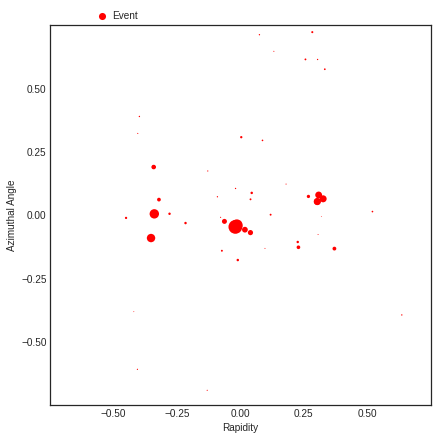

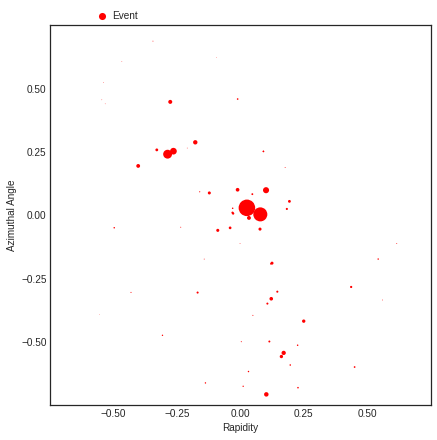

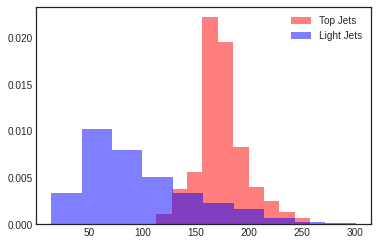

In [49]:
# Parameters
R = 0.5
beta = 1.0
N = 250
epochs = 75
mass_lower = 145
mass_upper = 205
eta_cut = 1.3
plot_dir = "results"



signal, signal_masses = load_dataset("../Datasets/top/v0/signal_train.npy", N, mass_lower, mass_upper, eta_cut)
background, background_masses = load_dataset("../Datasets/top/v0/background_train.npy", N, mass_lower, mass_upper, eta_cut)
events = [signal, background]
event_labels = ["signal", "background"]
colors = ["red", "blue"]


fake_top, fake_top_z = np.array(( (-1.0,0.0), (0.0,0.0), (1.0,0.0),)), np.array((1/3, 1/3, 1/3))
fake_signal = ((fake_top, fake_top_z), )
fake_quark, fake_quark_z = np.array(((0.0,0.0),)), np.array((1.0, ))
fake_background = ((fake_quark, fake_quark_z),)
fake_events = [fake_signal, fake_background]


# Example plots
example_signal = signal[0]
plot_event(example_signal[0], example_signal[1], R, color = "red")

example_background = background[0]
plot_event(example_background[0], example_background[1], R, color = "blue")

plt.hist(signal_masses, color = "red", alpha = 0.5, label = "Top Jets", density = True)
plt.hist(background_masses, color = "blue", alpha = 0.5, label = "Light Jets", density = True)
plt.legend()


In [50]:
_1subjettiness = NStructure(Point, N = 1, name = "1-Subjettiness", initializer = "kt", R = R, beta = beta)
_2subjettiness = NStructure(Point, N = 2, name = "2-Subjettiness", initializer = "kt", R = R, beta = beta)
_3subjettiness = NStructure(Point, N = 3, name = "3-Subjettiness", initializer = "kt", R = R, beta = beta)

observables = [
              _1subjettiness, _2subjettiness, _3subjettiness,
               #    _thrust, 
            #    _3diskiness_plus_pileup,
            #    _isotropy,
               # _3ellipsiness,
               # _1ellipsiness_plus_pileup
               ]

training_config_dict = {"epochs" : 500,
                        "optimizer" : tf.keras.optimizers.Adam(lr = 0.005),
                        "verbose" : False,
                        "early_stop" : 25,
                        "resample" : True,
                        "z_schedule": 0.1}

In [51]:
emds_old = np.zeros(shape = (len(events),len(observables), N))
times_old = np.zeros(shape = (len(events),len(observables), N))

# Calculate the EMDs for each observable, for each event
for (i, event_type) in enumerate(events):
    for (j, obs) in enumerate(observables):
        for (k, event) in enumerate(events[i]):

            t1 = time()
            params = obs.calculate(event, training_config_dict)
            emds_old[i,j,k] = params["EMD"]
            t2 = time()
            times_old[i,j,k] = t2 - t1

            print("Event %d" %k, "Obs: %s" % obs.name, "Class: %s" % event_labels[i], "Value: %.3f" % params["EMD"], "Finished in %.3fs" % (t2 - t1))

print(np.sum(times_old))

df = pd.DataFrame(emds_old)
df.to_csv("emds_old.csv")
df = pd.DataFrame(times_old)
df.to_csv("times_old.csv")

Event 0 Obs: 1-Subjettiness Class: signal Value: 0.476 Finished in 2.433s
Event 1 Obs: 1-Subjettiness Class: signal Value: 0.569 Finished in 0.208s
Event 2 Obs: 1-Subjettiness Class: signal Value: 0.422 Finished in 0.303s
Event 3 Obs: 1-Subjettiness Class: signal Value: 0.461 Finished in 0.444s
Event 4 Obs: 1-Subjettiness Class: signal Value: 0.439 Finished in 0.320s
Event 5 Obs: 1-Subjettiness Class: signal Value: 0.675 Finished in 0.323s
Event 6 Obs: 1-Subjettiness Class: signal Value: 0.397 Finished in 0.297s
Event 7 Obs: 1-Subjettiness Class: signal Value: 0.596 Finished in 0.276s
Event 8 Obs: 1-Subjettiness Class: signal Value: 0.620 Finished in 0.371s
Event 9 Obs: 1-Subjettiness Class: signal Value: 0.604 Finished in 0.381s
Event 10 Obs: 1-Subjettiness Class: signal Value: 0.460 Finished in 0.478s
Event 11 Obs: 1-Subjettiness Class: signal Value: 0.560 Finished in 0.585s
Event 12 Obs: 1-Subjettiness Class: signal Value: 0.404 Finished in 0.326s
Event 13 Obs: 1-Subjettiness Class:

ValueError: Must pass 2-d input. shape=(2, 3, 250)

## Sinkhorn

In [52]:
import torch
from torch.autograd import grad
from torch import optim
from geomloss import SamplesLoss
from pyjet import cluster

use_cuda = torch.cuda.is_available()
dtype = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor

In [53]:
class CoolPoint(object):

    def __init__(self, mean, z, N = 1):

        self.center = torch.tensor(mean)
        self.z = torch.tensor(z)
        self.N = N

        self.parameters = [self.center]

        self.t = self.sample(self.N)

        self.name = "Point"

    def initialize(self, event, R):
        self.center = torch.tensor(event, dtype = torch.double)
        self.parameters = [self.center]

    def sample(self,N):
        return self.center.reshape((1,-1))

    def get_event(self):
        self.t = self.sample(self.N)
        return (self.center.reshape(1,-1), self.z * torch.ones((self.N,)) / self.N)


    def get_zs(self):
        return self.get_event()[1].detach().numpy()

    def get_points(self):
        return self.get_event()[0].detach().numpy()

    def draw(self,ax):
        pass

    def print(self):
        pass

    def __str__(self):
        return "z: %.3f GeV" % (self.z.data)

class MixtureModel(object):

    def __init__(self, shapes = None):

        self.shapes = shapes
        self.zs = [shape.z for shape in self.shapes]
        self.parameters = []
        for shape in shapes:
            self.parameters += shape.parameters
        

    def get_event(self):
        event = concatenate_events([shape.get_event() for shape in self.shapes])
        return event

    def get_zs(self):
        return self.get_event()[1]

    def get_points(self):
        return self.get_event()[0]

    def initialize(self, event, R):
        points = kt_initializer(event, len(self.shapes), R)
        for (i, shape) in enumerate(self.shapes):
            shape.initialize(points[i],R)

    def normalize(self):
            
        z_test = activate(torch.tensor(self.zs).reshape((1, -1)))
        for (i, shape) in enumerate(self.shapes):
            shape.z.data = z_test[0,i]
        self.zs = [shape.z for shape in self.shapes]    


def concatenate_events(events):
    points, zs = [], []
    for event in events:
        points.append(event[0])
        zs.append(event[1])
    points = torch.cat(points, dim = 0)
    zs = torch.cat(zs, dim = 0)
    return (points, zs)


def activate(x):
    m, n = x.shape
    cnt_m = torch.arange(m, device=x.device)
    cnt_n = torch.arange(n, device=x.device)
    u = x.sort(dim=1, descending=True).values
    v = (u.cumsum(dim=1) - 1) / (cnt_n + 1)
    w = v[cnt_m, (u > v).sum(dim=1) - 1]
    return (x - w.view(m, 1)).relu()


def kt_initializer(event, N, R):

    y, z = event

    four_vectors = []
    for (y_i, z_i) in zip(y, z):
        v = (z_i, y_i[0], y_i[1], 0)
        four_vectors.append(v)
    four_vectors = np.array(four_vectors, dtype = [("pt", "f8"),("eta", "f8"),("phi", "f8"),("mass", "f8")])
    sequence = cluster(four_vectors, R=R, p=1)
    jets = sequence.exclusive_jets(N)

    # Apply initialization
    jets = jets[:N]
    initialization = []
    for jet in jets:
        initialization.append([jet.phi, jet.eta])
    initialization = np.array(initialization).astype(np.float32)
    return initialization

In [93]:



_1point = MixtureModel(shapes = [CoolPoint((0.0,0.0), 1.0)])
_2point = MixtureModel(shapes = [CoolPoint((-1.0,0.0), 0.5), CoolPoint((1.0,0.0), 0.5)])
_3point = MixtureModel(shapes = [CoolPoint((-1.0,0.0), 0.333), CoolPoint((1.0,0.0), 0.333), CoolPoint((0.0,0,0), 0.333)])

observables = [_1point, _2point, _3point]


def train(event, observable, epochs = 500, lr = 0.05, early_stopping = 25, epsilon = 0.01, annealing = 0.99):

    count = 0
    min_loss = np.inf
    observable.initialize(event, R)


    # Require grad:
    parameters = []
    for shape in observable.shapes:
        shape.sample(shape.N)
        for parameter in shape.parameters:
            parameter.requires_grad = True
            parameters.append(parameter)
        shape.z.requires_grad = True


    if len(observable.shapes) > 1:
        optimizer = optim.Adam([*parameters, *observable.zs], lr = lr)  
    else:
        optimizer = optim.Adam([*parameters,], lr = lr, betas=(0.9, 0.999))  



    for i in range(epochs):
        loss = train_step(event, observable, optimizer, i, lr, epsilon = epsilon)
        if loss < min_loss * (1 - epsilon):
            count = 0
            min_loss = loss
        else:
            count += 1
        if count == early_stopping:
            break

        lr *= annealing

    for shape in observable.shapes:
        print(shape.parameters, shape.z)

    return min_loss

def train_step(event, observable, optimizer = None, epoch = 0, lr = None, epsilon = 0.01):

    Loss = SamplesLoss("sinkhorn", p = beta, blur = epsilon**(1/beta))




    # Create a copy of the data...
    x_i, a_i = event
    y_j, b_j = observable.get_event()

    # Compute the loss + gradients:
    Loss_xy = Loss(torch.tensor(a_i), torch.tensor(x_i), b_j, y_j) / R
    # Loss_xy.backward(retain_graph=True)
    # optimizer.step()
    for shape in observable.shapes: 
        param_grads = grad(Loss_xy, shape.parameters, retain_graph=True)
        for i,parameter in enumerate(shape.parameters):
            parameter.data -= lr * param_grads[i]
        if len(observable.shapes) > 0:
            z_grads = grad(Loss_xy, shape.z, retain_graph=True)
            shape.z.data -=   lr * z_grads[0]

    observable.normalize()

    # print("Epoch = ", epoch, "Loss = ", Loss_xy , ", zs = " ,observable.zs)
    # plot(x_i, a_i, y_j.detach().numpy(), b_j.detach().numpy(), np.zeros((a_i.shape[0], b_j.shape[0])), Loss_xy.detach().numpy(), R, 1.0,  "temp/epoch_%d.png" % epoch,"Epoch %d" % epoch, observable.shapes)
    # # Require grad:
    # for shape in observable.shapes:
    #     shape.sample(shape.N)
    #     for parameter in shape.parameters:
    #         parameter.requires_grad = True
    #     shape.z.requires_grad = True


    return Loss_xy.detach().numpy()


In [98]:
emds_sinkhorn = np.zeros(shape = (len(events),len(observables), N))
times_sinkhorn = np.zeros(shape = (len(events),len(observables), N))

# Calculate the EMDs for each observable, for each event
for (i, event_type) in enumerate(events):
    for (j, obs) in enumerate(observables):
        for (k, event) in enumerate(events[i]):

            t1 = time()
            emd = train(event, obs, epsilon = 0.001, early_stopping = 25, lr = 0.05)
            emds_sinkhorn[i,j,k] = emd
            t2 = time()
            times_sinkhorn[i,j,k] = t2 - t1

            print("Event %d" %k, "Class: %s" % event_labels[i], "Value: %.3f" % emd, "Finished in %.3fs" % (t2 - t1))

print(np.sum(times_sinkhorn))


# df = pd.DataFrame(emds_sinkhorn)
# df.to_csv("emds_sinkhorn.csv")
# df = pd.DataFrame(times_sinkhorn)
# df.to_csv("times_sinkhorn.csv")

[tensor([-0.0273, -0.0247], dtype=torch.float64, requires_grad=True)] tensor(1., requires_grad=True)
Event 0 Class: signal Value: 0.385 Finished in 0.658s
[tensor([-0.0791,  0.0032], dtype=torch.float64, requires_grad=True)] tensor(1., requires_grad=True)
Event 1 Class: signal Value: 0.476 Finished in 0.791s
[tensor([0.0347, 0.0193], dtype=torch.float64, requires_grad=True)] tensor(1., requires_grad=True)
Event 2 Class: signal Value: 0.314 Finished in 0.504s
[tensor([0.0561, 0.1135], dtype=torch.float64, requires_grad=True)] tensor(1., requires_grad=True)
Event 3 Class: signal Value: 0.379 Finished in 0.569s
[tensor([-0.0733, -0.1060], dtype=torch.float64, requires_grad=True)] tensor(1., requires_grad=True)
Event 4 Class: signal Value: 0.343 Finished in 0.755s
[tensor([-0.0489, -0.0080], dtype=torch.float64, requires_grad=True)] tensor(1., requires_grad=True)
Event 5 Class: signal Value: 0.496 Finished in 1.521s
[tensor([-0.0227, -0.0072], dtype=torch.float64, requires_grad=True)] tens

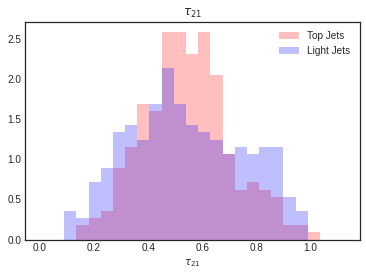

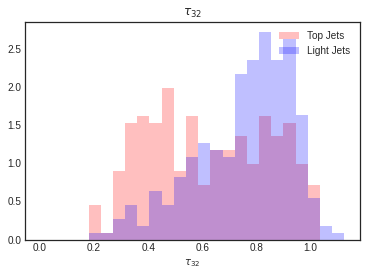

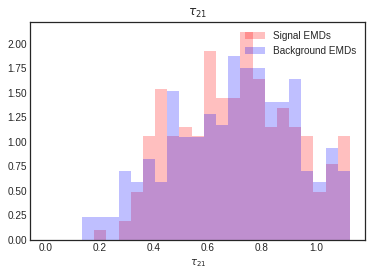

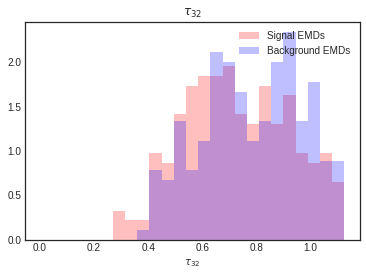

In [92]:
for j in range(2):
    plt.hist(emds_old[0,j+1,:] / emds_old[0,j,:], bins = 25, range=(0.0, 1.125), density = True, color = "red", label = "Top Jets", histtype="stepfilled", alpha = 0.25)
    plt.hist(emds_old[1,j+1,:] / emds_old[1,j,:], bins = 25, range=(0.0, 1.125), density = True, color = "blue", label = "Light Jets", histtype="stepfilled", alpha = 0.25)
    # plt.hist(emds_sinkhorn[0,j+1,:] / emds_sinkhorn[0,j,:], bins = 25, range=(0.0, 1.125), density = True, color = "darkred", label = "Signal Sinkhorn", histtype="stepfilled", alpha = 0.25)
    # plt.hist(emds_sinkhorn[1,j+1,:] / emds_sinkhorn[1,j,:], bins = 25, range=(0.0, 1.125), density = True, color = "darkblue", label = "Background Sinkhorn", histtype="stepfilled", alpha = 0.25)
    plt.title(r"$\tau_{%d %d}$" % (j+2, j+1))
    plt.xlabel(r"$\tau_{%d %d}$" % (j+2, j+1))
    plt.legend()
    plt.show()



for j in range(2):
    plt.hist(emds_sinkhorn[0,j+1,:] / emds_sinkhorn[0,j,:], bins = 25, range=(0.0, 1.125), density = True, color = "darkred", label = "Signal EMDs", histtype="stepfilled", alpha = 0.25)
    plt.hist(emds_sinkhorn[1,j+1,:] / emds_sinkhorn[1,j,:], bins = 25, range=(0.0, 1.125), density = True, color = "darkblue", label = "Background EMDs", histtype="stepfilled", alpha = 0.25)
    plt.title(r"$\tau_{%d %d}$" % (j+2, j+1))
    plt.xlabel(r"$\tau_{%d %d}$" % (j+2, j+1))
    plt.legend()
    plt.show()

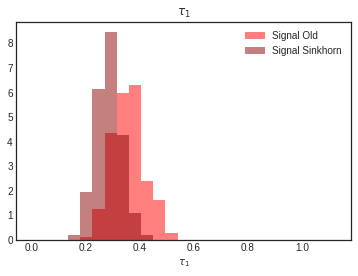

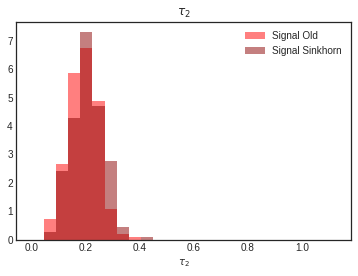

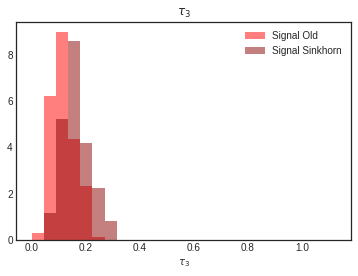

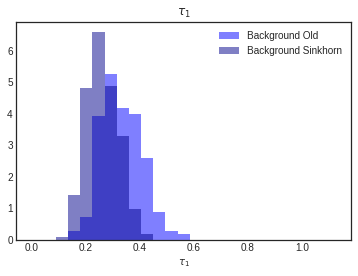

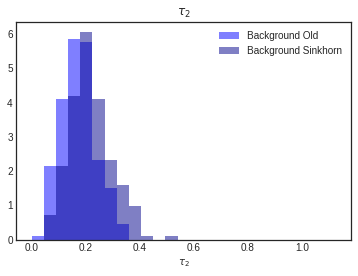

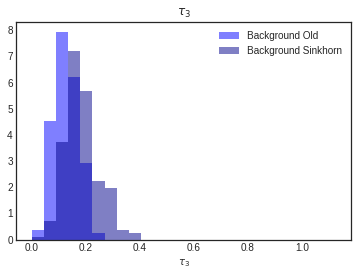

In [91]:
for j in range(3):
    plt.hist(emds_old[0,j,:] * 0.5 / 0.8, bins = 25, range=(0.0, 1.125), density = True, color = "red", label = "Signal Old", histtype="stepfilled", alpha = 0.5)
    plt.hist(emds_sinkhorn[0,j,:] * 0.5 / 0.8, bins = 25, range=(0.0, 1.125), density = True, color = "darkred", label = "Signal Sinkhorn", histtype="stepfilled", alpha = 0.5)
    plt.title(r"$\tau_{%d}$" % (j+1))
    plt.xlabel(r"$\tau_{%d}$" % (j+1))
    plt.legend()
    plt.show()

for j in range(3):
    plt.hist(emds_old[1,j,:] * 0.5 / 0.8 , bins = 25, range=(0.0, 1.125), density = True, color = "blue", label = "Background Old", histtype="stepfilled", alpha = 0.5)
    plt.hist(emds_sinkhorn[1,j,:] * 0.5 / 0.8, bins = 25, range=(0.0, 1.125), density = True, color = "darkblue", label = "Background Sinkhorn", histtype="stepfilled", alpha = 0.5)
    plt.title(r"$\tau_{%d}$" % (j+1))
    plt.xlabel(r"$\tau_{%d}$" % (j+1))
    plt.legend()
    plt.show()


In [95]:
train(example_signal, _1point, lr = 0.05, early_stopping= 50, epsilon = 0.001)

[tensor([-0.0032, -0.0511], dtype=torch.float64, requires_grad=True)] tensor(1., requires_grad=True)


array(0.38512663)